**This is the third lab of Data Mining**

**NOTE1 : Assignment 2 has some of its steps to reach its final goal done within assignment 1.** 

**NOTE2: Each notes written in markdown were done while writing and testing the code. The actual result and interpretations can be found in the Analytical Report.**

In order to best use ressources for direct mailing  to sell caravan insurance policies, we need to understand what target customers are likely to be interested. This will allow us to reduce waste and unecessary cost while maximizing marketing return on investment. In order to do that we have an extensive data set of 86 variables on which we can train our model. 
Having 86 features is likely to be excessive and would create noise in trying to predict if a potential target is indeed a potential customer. A key here will be in a first step to identify the most relevant features/ variables to retain and validate if they make sense from a domain expert point of view. (on s'en fou de la couleur du chien lol)


In [1]:
#!pip install xgboost --> Now done

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

from tabulate import tabulate

# import xgboost as xgb
# from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Assignment 1

In [3]:
#First load the training data: 

training = r"C:\Users\jules\OneDrive\Documents\Maastricht (DSDM)\Master\Year 1\Sept-Jan\KEN4113 DM\LAB2\caravan.csv"
DF = pd.read_csv(training)
DF

,Customer Subtype,Number of houses,Avg size household,Avg Age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,...,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of re policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,CARAVAN POLICY
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,0
5818,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
5819,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,1
5820,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Determine X and Y variable

Xtrain = DF.iloc[:, :-1] #--> Every columns but the last one
Ytrain = DF.iloc[:,-1] #--> Last column (CARAVAN POLICY)

In [5]:
Xtrain

,Customer Subtype,Number of houses,Avg size household,Avg Age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,...,Number of life insurances,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of re policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,0,1,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,0,1,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,0,1,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,8,0,6,1,2,1,...,2,0,0,0,1,0,0,0,0,0
5818,35,1,4,4,8,1,4,1,4,6,...,0,0,0,0,1,0,0,0,0,0
5819,33,1,3,4,8,0,6,0,3,5,...,0,0,0,0,1,0,0,0,0,0
5820,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Ytrain

0       0
1       0
2       0
3       0
4       0
       ..
5817    0
5818    0
5819    1
5820    0
5821    0
Name: CARAVAN POLICY, Length: 5822, dtype: int64

In [7]:
# help(make_pipeline)

In [8]:
# Let's identify the optimum number of features that best explain the data. (find best k)

matrixOfParams= {
    'selectkbest__k': [1, 2, 3, 4, 5, 6, 10, 20, 40, 60, 'all'],
    'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100] }

# Let's create a pipeline to identify the optimal k
classifier = LogisticRegression()
pipeClassifier = make_pipeline(SelectKBest(chi2), classifier) #--> We will test multiple k values
# pipeClassifier.fit(X, Y) #x and y are matrices (columns-1, last column)

# Do a grid search with cross validation to determine best k
gridSearch = GridSearchCV(pipeClassifier, matrixOfParams, cv = 5, scoring ='accuracy')
gridSearch.fit(Xtrain, Ytrain)

bestK = gridSearch.best_params_['selectkbest__k']
bestC = gridSearch.best_params_['logisticregression__C']

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [9]:
bestK

2

2 is suspicious.. Seems way too low

In [10]:
bestC

0.1

In [11]:
#Look up the retained features 

selected = SelectKBest(score_func=chi2, k=bestK)
selected.fit(Xtrain, Ytrain)

#use 'get_support' to retrieve the retained features
retainedFeatures = selected.get_support(indices=True)

#make it a list for better use with the original DF
retainedFeatures_list = retainedFeatures.tolist()

#Show it as a DF
XtrainSelected = Xtrain.iloc[:, retainedFeatures]

XtrainSelected

,Contribution car policies,Contribution boat policies
0,6,0
1,0,0
2,6,0
3,6,0
4,0,0
...,...,...
5817,6,0
5818,0,0
5819,6,0
5820,6,0


These features/variables do not seem right/sufficient.. They probably will provide a good accuracy but let's look at the full set of performance indicators on the test data.

In [13]:
#redo pipeClassifier now that we have found the best k
pipeClassifier = make_pipeline(SelectKBest(chi2, k=bestK), classifier)
pipeClassifier.fit(Xtrain, Ytrain)

Pipeline(steps=[('selectkbest',
                 SelectKBest(k=2,
                             score_func=<function chi2 at 0x0000024A062C2CA0>)),
                ('logisticregression', LogisticRegression())])

In [14]:
#Try the model on the test data

#load the test data
test = r"C:\Users\jules\OneDrive\Documents\Maastricht (DSDM)\Master\Year 1\Sept-Jan\KEN4113 DM\LAB2\caravanTest.csv"
DFtest = pd.read_csv(test)

#Extract X and Y test
Xtest = DF.iloc[:, :-1] #--> Every columns but the last one
Ytest = DF.iloc[:,-1] #--> Last column

In [15]:
DFtest

,Customer Subtype,Number of houses,Avg size household,Avg Age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,...,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of re policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,CARAVAN POLICY
0,33,1,4,2,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,...,0,0,0,1,0,0,0,0,0,1
2,39,1,3,3,9,1,4,2,3,5,...,0,0,0,1,0,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,33,1,2,4,8,0,7,2,0,5,...,0,0,0,1,0,0,0,0,0,0
3996,24,1,2,3,5,1,5,1,3,4,...,0,0,0,1,0,0,0,0,0,1
3997,36,1,2,3,8,1,5,1,3,7,...,0,0,0,1,0,0,0,1,0,0
3998,33,1,3,3,8,1,4,2,3,7,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#Let's infer the model on test data
Ypred = pipeClassifier.predict(Xtest)

#Let's get the statistics: 
accuracy = accuracy_score(Ytest, Ypred)
precision = precision_score(Ytest, Ypred)
recall = recall_score(Ytest, Ypred)
f1 = f1_score(Ytest, Ypred)

print("accuracy =", accuracy)
print("precision = ", precision)
print("f1 = ", f1)
print("recall = ", recall)


accuracy = 0.9400549639299209
precision =  0.3333333333333333
f1 =  0.005698005698005697
recall =  0.0028735632183908046


THIS SUCKS
Accuracy is good but F1 and recall are REALLY bad 
SO the grid search on k best should may be done on 'recall'
Let's try again!

In [17]:
# Let's identify the optimum number of features that best explain the data. (find best k)

matrixOfParams= {
    'selectkbest__k': [1, 2, 3, 4, 5, 6, 10, 20, 40, 60, 'all'],
    'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100] }

# Let's create a pipeline to identify the optimal k
classifier = LogisticRegression()
pipeClassifier = make_pipeline(SelectKBest(chi2), classifier) #--> We will test multiple k values
# pipeClassifier.fit(X, Y) #x and y are matrices (columns-1, last column)

# Do a grid search with cross validation to determine best k
gridSearch = GridSearchCV(pipeClassifier, matrixOfParams, cv = 5, scoring ='recall')
gridSearch.fit(Xtrain, Ytrain)

bestK = gridSearch.best_params_['selectkbest__k']
bestC = gridSearch.best_params_['logisticregression__C']

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [18]:
bestK

40

In [19]:
#Look up the retained features 

selected = SelectKBest(score_func=chi2, k=bestK)
selected.fit(Xtrain, Ytrain)

#use 'get_support' to retrieve the retained features
retainedFeatures = selected.get_support(indices=True)

#make it a list for better use with the original DF
retainedFeatures_list = retainedFeatures.tolist()

#Show it as a DF
XtrainSelected = Xtrain.iloc[:, retainedFeatures]

XtrainSelected

,Customer Subtype,Customer main type,Married,Other relation,Singles,High level education,Lower level education,High status,Farmer,Middle Management,...,Contribution fire policies,Contribution boat policies,Contribution social security insurance policies,Number of private third party insurance,Number of car policies,Number of moped policies,Number of life insurances,Number of re policies,Number of boat policies,Number of social security insurance policies
0,33,8,7,2,1,1,7,1,1,2,...,5,0,0,0,1,0,0,1,0,0
1,37,8,6,2,0,0,4,0,0,5,...,2,0,0,2,0,0,0,1,0,0
2,37,8,3,4,4,0,4,0,0,7,...,2,0,0,1,1,0,0,1,0,0
3,9,3,5,2,2,3,2,4,0,3,...,2,0,0,0,1,0,0,1,0,0
4,40,10,7,2,2,5,0,0,4,0,...,6,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,8,1,6,5,2,2,2,0,4,...,3,0,0,1,1,0,2,1,0,0
5818,35,8,6,3,2,0,9,2,1,3,...,5,0,0,0,0,1,0,1,0,0
5819,33,8,5,4,3,0,8,1,0,2,...,4,0,0,1,1,0,0,1,0,0
5820,34,8,7,0,0,0,7,0,0,2,...,0,0,0,0,1,0,0,0,0,0


In [20]:
#redo pipeClassifier now that we have found the best k
pipeClassifier = make_pipeline(SelectKBest(chi2, k=bestK), classifier)
pipeClassifier.fit(Xtrain, Ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('selectkbest',
                 SelectKBest(k=40,
                             score_func=<function chi2 at 0x0000024A062C2CA0>)),
                ('logisticregression', LogisticRegression())])

In [21]:
#Let's infer the model on test data
Ypred = pipeClassifier.predict(Xtest)

#Let's get the statistics: 
accuracy = accuracy_score(Ytest, Ypred)
precision = precision_score(Ytest, Ypred)
recall = recall_score(Ytest, Ypred)
f1 = f1_score(Ytest, Ypred)

print("accuracy =", accuracy)
print("precision = ", precision)
print("f1 = ", f1)
print("recall = ", recall)


accuracy = 0.9400549639299209
precision =  0.4444444444444444
f1 =  0.022408963585434174
recall =  0.011494252873563218


We now have better stats but probably can do better

In [22]:
# Let's identify the optimum number of features that best explain the data. (find best k)

matrixOfParams= {
    'selectkbest__k': [1, 2, 3, 4, 5, 6, 10, 20, 40, 60, 'all'],
    'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100] }

# Let's create a pipeline to identify the optimal k
classifier = LogisticRegression()
pipeClassifier = make_pipeline(SelectKBest(chi2), classifier) #--> We will test multiple k values
# pipeClassifier.fit(X, Y) #x and y are matrices (columns-1, last column)

# Do a grid search with cross validation to determine best k
gridSearch = GridSearchCV(pipeClassifier, matrixOfParams, cv = 5, scoring ='f1')
gridSearch.fit(Xtrain, Ytrain)

bestK = gridSearch.best_params_['selectkbest__k']
bestC = gridSearch.best_params_['logisticregression__C']

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [23]:
bestK

40

In [24]:
#Look up the retained features 

selected = SelectKBest(score_func=chi2, k=bestK)
selected.fit(Xtrain, Ytrain)

#use 'get_support' to retrieve the retained features
retainedFeatures = selected.get_support(indices=True)

#make it a list for better use with the original DF
retainedFeatures_list = retainedFeatures.tolist()

#Show it as a DF
XtrainSelected = Xtrain.iloc[:, retainedFeatures]

XtrainSelected

,Customer Subtype,Customer main type,Married,Other relation,Singles,High level education,Lower level education,High status,Farmer,Middle Management,...,Contribution fire policies,Contribution boat policies,Contribution social security insurance policies,Number of private third party insurance,Number of car policies,Number of moped policies,Number of life insurances,Number of re policies,Number of boat policies,Number of social security insurance policies
0,33,8,7,2,1,1,7,1,1,2,...,5,0,0,0,1,0,0,1,0,0
1,37,8,6,2,0,0,4,0,0,5,...,2,0,0,2,0,0,0,1,0,0
2,37,8,3,4,4,0,4,0,0,7,...,2,0,0,1,1,0,0,1,0,0
3,9,3,5,2,2,3,2,4,0,3,...,2,0,0,0,1,0,0,1,0,0
4,40,10,7,2,2,5,0,0,4,0,...,6,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,8,1,6,5,2,2,2,0,4,...,3,0,0,1,1,0,2,1,0,0
5818,35,8,6,3,2,0,9,2,1,3,...,5,0,0,0,0,1,0,1,0,0
5819,33,8,5,4,3,0,8,1,0,2,...,4,0,0,1,1,0,0,1,0,0
5820,34,8,7,0,0,0,7,0,0,2,...,0,0,0,0,1,0,0,0,0,0


In [25]:
#redo pipeClassifier now that we have found the best k
pipeClassifier = make_pipeline(SelectKBest(chi2, k=bestK), classifier)
pipeClassifier.fit(Xtrain, Ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('selectkbest',
                 SelectKBest(k=40,
                             score_func=<function chi2 at 0x0000024A062C2CA0>)),
                ('logisticregression', LogisticRegression())])

In [26]:
#Let's infer the model on test data
Ypred = pipeClassifier.predict(Xtest)

#Let's get the statistics: 
accuracy = accuracy_score(Ytest, Ypred)
precision = precision_score(Ytest, Ypred)
recall = recall_score(Ytest, Ypred)
f1 = f1_score(Ytest, Ypred)

print("accuracy =", accuracy)
print("precision = ", precision)
print("f1 = ", f1)
print("recall = ", recall)


accuracy = 0.9400549639299209
precision =  0.4444444444444444
f1 =  0.022408963585434174
recall =  0.011494252873563218


The stats seem to be identical as with 'recall' 

let's still try with 'precision'

In [27]:
# Let's identify the optimum number of features that best explain the data. (find best k)

matrixOfParams= {
    'selectkbest__k': [1, 2, 3, 4, 5, 6, 10, 20, 40, 60, 'all'],
    'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100] }

# Let's create a pipeline to identify the optimal k
classifier = LogisticRegression()
pipeClassifier = make_pipeline(SelectKBest(chi2), classifier) #--> We will test multiple k values
# pipeClassifier.fit(X, Y) #x and y are matrices (columns-1, last column)

# Do a grid search with cross validation to determine best k
gridSearch = GridSearchCV(pipeClassifier, matrixOfParams, cv = 5, scoring ='precision')
gridSearch.fit(Xtrain, Ytrain)

bestK = gridSearch.best_params_['selectkbest__k']
bestC = gridSearch.best_params_['logisticregression__C']

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

In [28]:
bestK

60

In [29]:
#Look up the retained features 

selected = SelectKBest(score_func=chi2, k=bestK)
selected.fit(Xtrain, Ytrain)

# use 'get_support' to retrieve the retained features
retainedFeatures = selected.get_support(indices=True)

# make it a list for better use with the original DF
retainedFeatures_list = retainedFeatures.tolist()

#Show it as a DF
XtrainSelected = Xtrain.iloc[:, retainedFeatures]

XtrainSelected

,Customer Subtype,Customer main type,Protestant,No religion,Married,Living together,Other relation,Singles,Household with children,High level education,...,Number of tractor policies,Number of moped policies,Number of life insurances,Number of family accidents insurance policies,Number of disability insurance policies,Number of re policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of social security insurance policies
0,33,8,5,3,7,0,2,1,6,1,...,0,0,0,0,0,1,0,0,0,0
1,37,8,4,4,6,2,2,0,5,0,...,0,0,0,0,0,1,0,0,0,0
2,37,8,4,4,3,2,4,4,2,0,...,0,0,0,0,0,1,0,0,0,0
3,9,3,3,4,5,2,2,2,4,3,...,0,0,0,0,0,1,0,0,0,0
4,40,10,4,4,7,1,2,2,4,5,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,8,6,2,1,2,6,5,2,2,...,0,0,2,0,0,1,0,0,0,0
5818,35,8,4,4,6,0,3,2,5,0,...,0,1,0,0,0,1,0,0,0,0
5819,33,8,6,3,5,1,4,3,4,0,...,0,0,0,0,0,1,0,0,0,0
5820,34,8,7,2,7,2,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#redo pipeClassifier now that we have found the best k
pipeClassifier = make_pipeline(SelectKBest(chi2, k=bestK), classifier)
pipeClassifier.fit(Xtrain, Ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('selectkbest',
                 SelectKBest(k=60,
                             score_func=<function chi2 at 0x0000024A062C2CA0>)),
                ('logisticregression', LogisticRegression())])

In [31]:
#Let's infer the model on test data
Ypred = pipeClassifier.predict(Xtest)

#Let's get the statistics: 
accuracy = accuracy_score(Ytest, Ypred)
precision = precision_score(Ytest, Ypred)
recall = recall_score(Ytest, Ypred)
f1 = f1_score(Ytest, Ypred)

print("accuracy =", accuracy)
print("precision = ", precision)
print("f1 = ", f1)
print("recall = ", recall)


accuracy = 0.9397114393679148
precision =  0.38461538461538464
f1 =  0.027700831024930747
recall =  0.014367816091954023


slitghly different but still not great! In fact, worse this way.

Let's try a mix of the best scorings:

In [32]:
# Let's identify the optimum number of features that best explain the data. (find best k)

matrixOfParams= {
    'selectkbest__k': [1, 2, 3, 4, 5, 6, 10, 20, 40, 60, 'all'],
    'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100] }

# Let's create a pipeline to identify the optimal k
classifier = LogisticRegression()
pipeClassifier = make_pipeline(SelectKBest(chi2), classifier) 

# Do a grid search with cross validation to determine best k
gridSearch = GridSearchCV(pipeClassifier, matrixOfParams, cv = 10, scoring =['f1', 'recall'], refit = 'recall')
gridSearch.fit(Xtrain, Ytrain)

bestK = gridSearch.best_params_['selectkbest__k']
bestC = gridSearch.best_params_['logisticregression__C']

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [33]:
bestK

40

In [34]:
#Look up the retained features 

selected = SelectKBest(score_func=chi2, k=bestK)
selected.fit(Xtrain, Ytrain)

# use 'get_support' to retrieve the retained features
retainedFeatures = selected.get_support(indices=True)

# make it a list for better use with the original DF
retainedFeatures_list = retainedFeatures.tolist()

#Show it as a DF
XtrainSelected = Xtrain.iloc[:, retainedFeatures]

XtrainSelected

,Customer Subtype,Customer main type,Married,Other relation,Singles,High level education,Lower level education,High status,Farmer,Middle Management,...,Contribution fire policies,Contribution boat policies,Contribution social security insurance policies,Number of private third party insurance,Number of car policies,Number of moped policies,Number of life insurances,Number of re policies,Number of boat policies,Number of social security insurance policies
0,33,8,7,2,1,1,7,1,1,2,...,5,0,0,0,1,0,0,1,0,0
1,37,8,6,2,0,0,4,0,0,5,...,2,0,0,2,0,0,0,1,0,0
2,37,8,3,4,4,0,4,0,0,7,...,2,0,0,1,1,0,0,1,0,0
3,9,3,5,2,2,3,2,4,0,3,...,2,0,0,0,1,0,0,1,0,0
4,40,10,7,2,2,5,0,0,4,0,...,6,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,8,1,6,5,2,2,2,0,4,...,3,0,0,1,1,0,2,1,0,0
5818,35,8,6,3,2,0,9,2,1,3,...,5,0,0,0,0,1,0,1,0,0
5819,33,8,5,4,3,0,8,1,0,2,...,4,0,0,1,1,0,0,1,0,0
5820,34,8,7,0,0,0,7,0,0,2,...,0,0,0,0,1,0,0,0,0,0


In [35]:
#redo pipeClassifier now that we have found the best k

classifier = LogisticRegression(C = bestC)

pipeClassifier = make_pipeline(SelectKBest(chi2, k=bestK), classifier)
pipeClassifier.fit(Xtrain, Ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('selectkbest',
                 SelectKBest(k=40,
                             score_func=<function chi2 at 0x0000024A062C2CA0>)),
                ('logisticregression', LogisticRegression())])

In [36]:
#Find the coefficients to understand the relative weight of each retained feature:

coefs = pipeClassifier.named_steps['logisticregression'].coef_
print('Coefficients =', coefs) 

len(coefs[0]) #40 is correct!

Coefficients = [[ 9.02756911e-02 -3.88182932e-01  2.12946322e-01  1.37706893e-01
   1.43362171e-02  6.63607585e-02 -6.46118804e-02  4.40329994e-02
  -1.67512716e-01  8.66505337e-02  3.95116022e-02  7.15025567e-02
   1.91885161e-02 -5.34809458e-02 -4.11211900e-01 -3.76178378e-01
   6.71602355e-02 -6.29996587e-03 -3.33064458e-01 -3.85221135e-01
  -1.21792511e-02  1.11121725e-05  5.65514733e-02  1.81272894e-02
   6.09097355e-02  2.79600713e-01  2.24263515e-01 -1.04209070e-01
   2.14445502e-01  2.01110539e-01  1.98949766e-01  4.22929752e-01
   7.73454287e-02 -1.92222677e-01 -4.24203675e-02 -1.09916704e-01
   4.65016169e-03 -3.91047946e-01  4.82793372e-01  1.67345471e-01]]


40

In [37]:
#Let's infer the model on test data
Ypred = pipeClassifier.predict(Xtest)

#Let's get the statistics: 
accuracy = accuracy_score(Ytest, Ypred)
precision = precision_score(Ytest, Ypred)
recall = recall_score(Ytest, Ypred)
f1 = f1_score(Ytest, Ypred)

print("accuracy =", accuracy)
print("precision = ", precision)
print("f1 = ", f1)
print("recall = ", recall)


accuracy = 0.9400549639299209
precision =  0.4444444444444444
f1 =  0.022408963585434174
recall =  0.011494252873563218


In [38]:
print(classification_report(Ytest, Ypred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5474
           1       0.44      0.01      0.02       348

    accuracy                           0.94      5822
   macro avg       0.69      0.51      0.50      5822
weighted avg       0.91      0.94      0.91      5822



0 is for those without insurance, 1 is with insurance. 


in Phase 2:
in our selection we wont take those who are most likely to take an insurance but those who are the most unlikely to NOT take one.(1-prob(0))


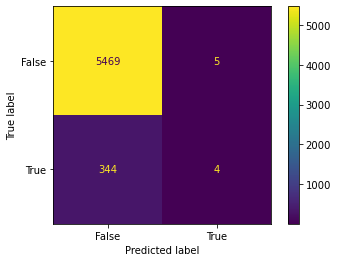

In [39]:
#show the confusion matrix
confMatrix = metrics.confusion_matrix(Ytest, Ypred)
showConfMatrix = metrics.ConfusionMatrixDisplay(confusion_matrix = confMatrix, display_labels = [False, True])


showConfMatrix.plot()
plt.savefig('Confusion Matrix.PNG')

This confusion matrix show the poor result.. 
There is a high amount of false positive but very little true positive...


really bad at detecting who is going to take it but is way better at detecting those who are not going to take the insurance. Therefore, phase 2 thing...

this is potentially normal given the fact that in our test set people that do not yet have an insurance may still be interested. Howevern the model performs decently at detecting true negative. Therefore we should try to understand the people that are definitely 
and by looking at the nnvert porba we can therefore select the most relevant to target


therefore finding true positives here is not the goal. We want to find those who we know are NOT Not interested
Therefore, instead of trying to find out who will take one...

# Assignment 2

Using the line model trained: "pipeClassifier", we can now select the 800 most likely policy owners. 

In [40]:
# check if Ypred contains some positive class
binaryWith1 = any(Ypred)

binaryWith1

True

Because it returns True, it means that Ypred contains both class 0 (negative class) and class 1 (positive class)

In [41]:
#just a repeat of the model predictions but this time with probabilities: 
Yproba = pipeClassifier.predict_proba(Xtest)

Yproba

array([[0.90176905, 0.09823095],
       [0.96652314, 0.03347686],
       [0.91179253, 0.08820747],
       ...,
       [0.936183  , 0.063817  ],
       [0.95090477, 0.04909523],
       [0.98668269, 0.01331731]])

In [42]:
YprobaClass0 = Yproba[:,0] #This is basically taking the negative class
YprobaClass0

array([0.90176905, 0.96652314, 0.91179253, ..., 0.936183  , 0.95090477,
       0.98668269])

In [43]:
df = pd.DataFrame({'Index': range(len(YprobaClass0)), 'YprobaClass0': YprobaClass0})

dfSorted=df.sort_values(by='YprobaClass0', ascending=True).reset_index(drop=True)

TopDFSorted = dfSorted.head(800)

TopDFSorted #

,Index,YprobaClass0
0,2953,0.212711
1,2188,0.306198
2,3509,0.307085
3,4881,0.358924
4,4634,0.406960
...,...,...
795,1471,0.881812
796,550,0.881920
797,4394,0.881996
798,3241,0.882074


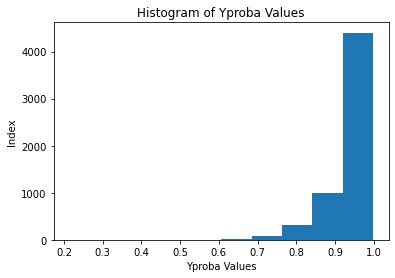

In [44]:
#display data on a histogram
plt.hist(dfSorted['YprobaClass0'])
plt.xlabel('Yproba Values')
plt.ylabel('Index')
plt.title('Histogram of Yproba Values')

plt.savefig('Histogram of Yproba Values.PNG')

plt.show()

this plot (histogram) does not show the best, let's try with scatter

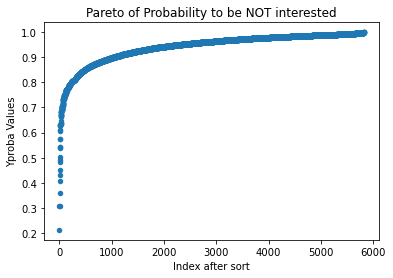

In [45]:
#Now show with a plot
plt.scatter(dfSorted.index, dfSorted['YprobaClass0'], marker='o', s=20)
plt.xlabel('Index after sort')
plt.ylabel('Yproba Values')
plt.title('Pareto of Probability to be NOT interested')

plt.savefig('Pareto of Probability to be NOT interested.PNG')
plt.show()

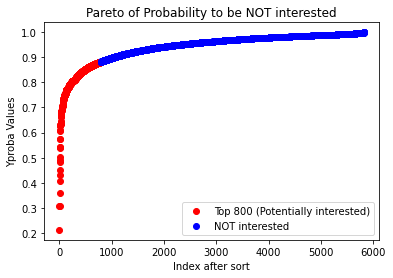

In [46]:
#Make a new plot showing the target customers: 
n = 800
plt.scatter(dfSorted.index[:n], dfSorted['YprobaClass0'][:n], color='r', label='Top 800 (Potentially interested)')
plt.scatter(dfSorted.index[n:], dfSorted['YprobaClass0'][n:], color='b', label='NOT interested')

plt.xlabel('Index after sort')
plt.ylabel('Yproba Values')
plt.title('Pareto of Probability to be NOT interested')
plt.legend()

plt.savefig('Pareto of Probability to be NOT interested RED AND BLUE.PNG')

plt.show()

The red is showing those we should target. They have the least chance not to be interested. 
We can observe that the probability to be not interested raises fast. If we want to use ressources effectively, we should limit our targeting.
10% seems already to big